In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msg
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Ques 1 - win ?

In [7]:
main_df = df1[((df1['team1'] == 'Sunrisers Hyderabad') & (df1['team2'] == 'Kings XI Punjab')) | ((df1['team1'] == 'Kings XI Punjab') & (df1['team2'] == 'Sunrisers Hyderabad'))]
main_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
18,19,2017,Hyderabad,2017-04-17,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,5,0,B Kumar,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,A Deshmukh,NaN
31,32,2017,Chandigarh,2017-04-28,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,26,0,Rashid Khan,"Punjab Cricket Association IS Bindra Stadium, ...",Nitin Menon,CK Nandan,NaN
404,405,2013,Hyderabad,2013-04-19,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Sunrisers Hyderabad,0,5,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",HDPK Dharmasena,CK Nandan,NaN
439,440,2013,Chandigarh,2013-05-11,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,30,0,PA Patel,"Punjab Cricket Association Stadium, Mohali",S Das,RJ Tucker,NaN
465,466,2014,Sharjah,2014-04-22,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kings XI Punjab,72,0,GJ Maxwell,Sharjah Cricket Stadium,M Erasmus,S Ravi,NaN
495,496,2014,Hyderabad,2014-05-14,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,WP Saha,"Rajiv Gandhi International Stadium, Uppal",VA Kulkarni,PG Pathak,NaN
543,544,2015,Chandigarh,2015-04-27,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,20,0,TA Boult,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,CB Gaffaney,NaN
563,564,2015,Hyderabad,2015-05-11,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,5,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena,NaN
593,594,2016,Hyderabad,2016-04-23,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,5,Mustafizur Rahman,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,CK Nandan,NaN
621,622,2016,Chandigarh,2016-05-15,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Sunrisers Hyderabad,0,7,HM Amla,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,M Erasmus,NaN


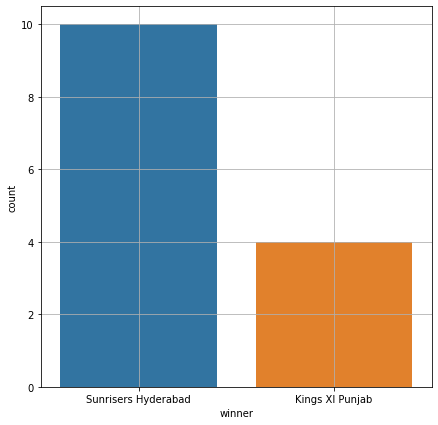

Sunrisers Hyderabad    10
Kings XI Punjab         4
Name: winner, dtype: int64


In [9]:
plt.figure(figsize  =(7,7))
sb.countplot(main_df['winner'])
plt.grid()
plt.show()
print(main_df['winner'].value_counts())

In [10]:
# recent 3 seasons

In [11]:
recent_match = main_df[main_df['season'] >= 2017]

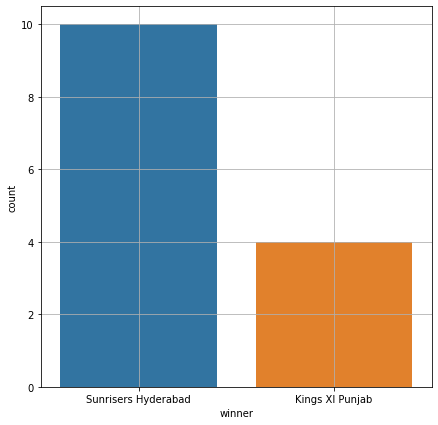

Sunrisers Hyderabad    10
Kings XI Punjab         4
Name: winner, dtype: int64


In [12]:
plt.figure(figsize  =(7,7))
sb.countplot(main_df['winner'])
plt.grid()
plt.show()
print(main_df['winner'].value_counts())

In [13]:
main_df.groupby(['toss_decision' , 'winner'])[['team2','team1']].count()

team2  team1
toss_decision winner                           
bat           Kings XI Punjab          1      1
              Sunrisers Hyderabad      3      3
field         Kings XI Punjab          3      3
              Sunrisers Hyderabad      7      7

In [14]:
recent_match.groupby(['toss_decision' , 'winner'])[['team2','team1']].count()

team2  team1
toss_decision winner                           
bat           Kings XI Punjab          1      1
field         Kings XI Punjab          1      1
              Sunrisers Hyderabad      4      4

# Take Aways : 
### 1 - Acc to this dataset , which was from INDIAN stadium ,SRH have won most of the match againt KXIP
### 2 - BUt ,in this year IPL , Chances of KXIP winning is much over SRH ,as the openers are playing beautifully specially Rahul and Mayank
### 3 - After the arrival of Gayle , the team looks strong now 
### 4 - The last match of both team went into a win
### 5 - Since ,the match is in Dubai International Std , bowlers will play a vital role here !

# Ques 1 ans - SRH

In [17]:
#########################################################################################################################

# Ques 2 - David Warner Status ?

In [79]:
main_df_team = df[(((df['batting_team'] == 'Kings XI Punjab')  & (df['bowling_team'] == 'Sunrisers Hyderabad')) | ((df['batting_team'] == 'Sunrisers Hyderabad')  & (df['bowling_team'] == 'Kings XI Punjab')))]
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4312,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,1,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4313,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,2,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4314,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,3,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4315,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,4,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4316,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,5,S Dhawan,DA Warner,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176407,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,2,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
176408,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,3,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
176409,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,4,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,M Ur Rahman,bowled,NaN
176410,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,5,Mohammed Shami,M Ashwin,S Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [19]:
# first count the strike rate

In [20]:
single = main_df_team[main_df_team['match_id'] == 19]

In [21]:
single

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4312,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,1,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4313,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,2,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4314,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,3,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4315,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,4,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4316,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,5,S Dhawan,DA Warner,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4556,19,2,Kings XI Punjab,Sunrisers Hyderabad,20,2,Sandeep Sharma,I Sharma,S Kaul,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
4557,19,2,Kings XI Punjab,Sunrisers Hyderabad,20,3,Sandeep Sharma,I Sharma,S Kaul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4558,19,2,Kings XI Punjab,Sunrisers Hyderabad,20,4,I Sharma,Sandeep Sharma,S Kaul,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
4559,19,2,Kings XI Punjab,Sunrisers Hyderabad,20,5,I Sharma,Sandeep Sharma,S Kaul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [24]:
david = single[single['batsman'] == 'DA Warner']
david

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4312,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,1,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4313,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,2,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4314,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,3,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4315,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,4,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4317,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,6,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
4318,19,1,Sunrisers Hyderabad,Kings XI Punjab,2,1,DA Warner,S Dhawan,I Sharma,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
4320,19,1,Sunrisers Hyderabad,Kings XI Punjab,2,3,DA Warner,S Dhawan,I Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4323,19,1,Sunrisers Hyderabad,Kings XI Punjab,2,6,DA Warner,S Dhawan,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4324,19,1,Sunrisers Hyderabad,Kings XI Punjab,2,7,DA Warner,S Dhawan,I Sharma,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
4325,19,1,Sunrisers Hyderabad,Kings XI Punjab,2,8,DA Warner,S Dhawan,I Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [28]:
david.pivot_table(index = ['match_id'] , aggfunc=['sum' , 'count'], values = ['batsman_runs','ball'])

sum              count             
         ball batsman_runs  ball batsman_runs
match_id                                     
19        208           70    57           57

In [80]:
david= main_df_team[(main_df_team['batsman'] == 'DA Warner') & (main_df_team['bowling_team'] == 'Kings XI Punjab')]

In [46]:
david = david.pivot_table(index = ['match_id'] , aggfunc=['sum' , 'count'], values = ['batsman_runs','ball'])

In [47]:
david

sum              count             
         ball batsman_runs  ball batsman_runs
match_id                                     
19        208           70    57           57
32         95           51    27           27
466        51            8    12           12
496        84           44    24           24
544       135           58    41           41
564       205           81    54           54
594       124           59    32           32
622       143           52    42           42
11313     232           74    63           63
11339     221           91    61           61

In [48]:
david = pd.DataFrame(david.to_records())

In [49]:
david

,match_id,"('sum', 'ball')","('sum', 'batsman_runs')","('count', 'ball')","('count', 'batsman_runs')"
0,19,208,70,57,57
1,32,95,51,27,27
2,466,51,8,12,12
3,496,84,44,24,24
4,544,135,58,41,41
5,564,205,81,54,54
6,594,124,59,32,32
7,622,143,52,42,42
8,11313,232,74,63,63
9,11339,221,91,61,61


In [50]:
david = david.rename(columns={"('sum', 'batsman_runs')": "runs" , "('count', 'ball')":"balls"})

In [51]:
david 

,match_id,"('sum', 'ball')",runs,balls,"('count', 'batsman_runs')"
0,19,208,70,57,57
1,32,95,51,27,27
2,466,51,8,12,12
3,496,84,44,24,24
4,544,135,58,41,41
5,564,205,81,54,54
6,594,124,59,32,32
7,622,143,52,42,42
8,11313,232,74,63,63
9,11339,221,91,61,61


In [52]:
david['strike_rate'] = (david['runs'] / david['balls'])*100

In [53]:
david

,match_id,"('sum', 'ball')",runs,balls,"('count', 'batsman_runs')",strike_rate
0,19,208,70,57,57,122.807018
1,32,95,51,27,27,188.888889
2,466,51,8,12,12,66.666667
3,496,84,44,24,24,183.333333
4,544,135,58,41,41,141.463415
5,564,205,81,54,54,150.000000
6,594,124,59,32,32,184.375000
7,622,143,52,42,42,123.809524
8,11313,232,74,63,63,117.460317
9,11339,221,91,61,61,149.180328


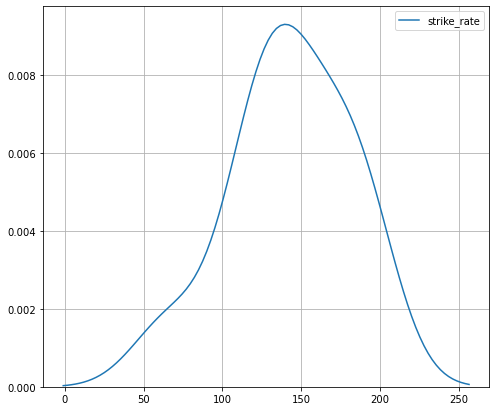

In [59]:
plt.figure(figsize = (8,7))
sb.kdeplot(david['strike_rate'])
plt.grid()
plt.show()

In [60]:
Avg_sr = david['strike_rate'].sum() / len(david)

In [61]:
Avg_sr

142.79844902055885

In [66]:
# lets check wrt to all team

In [67]:
main_df_team_only_srh = df[ ((df['batting_team'] == 'Sunrisers Hyderabad'))]
main_df_team_only_srh

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178462,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,5,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178463,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,6,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,Mohammad Nabi,caught,AR Patel
178464,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,7,DJ Hooda,Rashid Khan,K Paul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178465,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,8,Rashid Khan,B Kumar,K Paul,0,...,0,0,0,0,0,0,0,Rashid Khan,caught,RR Pant


In [68]:
david= main_df_team_only_srh[(main_df_team_only_srh['batsman'] == 'DA Warner')]
david = david.pivot_table(index = ['match_id'] , aggfunc=['sum' , 'count'], values = ['batsman_runs','ball'])
david

sum              count             
         ball batsman_runs  ball batsman_runs
match_id                                     
1          29           14     9            9
6         162           76    47           47
10        116           49    34           34
14        112           26    31           31
19        208           70    57           57
...       ...          ...   ...          ...
11324      96           51    26           26
11329     140           70    39           39
11332     158           59    47           47
11336     108           40    33           33
11339     221           91    61           61

[71 rows x 4 columns]

In [69]:
david = pd.DataFrame(david.to_records())
david = david.rename(columns={"('sum', 'batsman_runs')": "runs" , "('count', 'ball')":"balls"})

In [70]:
david

,match_id,"('sum', 'ball')",runs,balls,"('count', 'batsman_runs')"
0,1,29,14,9,9
1,6,162,76,47,47
2,10,116,49,34,34
3,14,112,26,31,31
4,19,208,70,57,57
...,...,...,...,...,...
66,11324,96,51,26,26
67,11329,140,70,39,39
68,11332,158,59,47,47
69,11336,108,40,33,33


In [71]:
david['strike_rate'] = (david['runs'] / david['balls'])*100

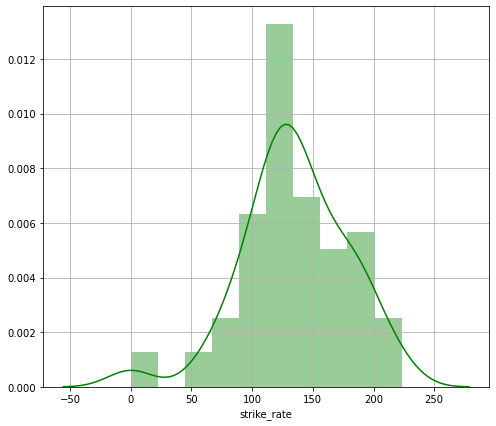

In [75]:
plt.figure(figsize = (8,7))
sb.distplot(david['strike_rate'] , color = "green")
plt.grid()
plt.show()

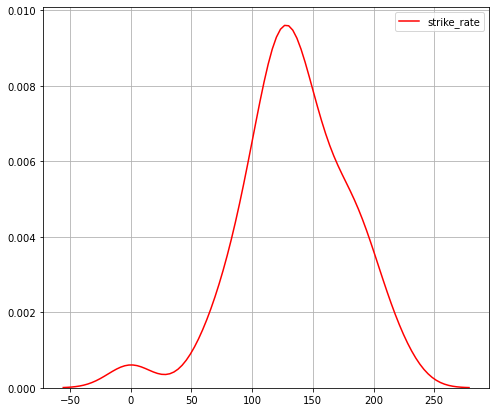

In [74]:
plt.figure(figsize = (8,7))
sb.kdeplot(david['strike_rate'] , color = "r")
plt.grid()
plt.show()

In [76]:
Avg_srall = david['strike_rate'].sum() / len(david)
Avg_srall

134.59947213423246

In [77]:
#Hence sr > 125

In [78]:
# check for out

In [81]:
david = david.pivot_table(index = ['match_id'] , aggfunc=[ 'count'], values = ['ball','player_dismissed'])

In [82]:
david

count                 
          ball player_dismissed
match_id                       
19          57                0
32          27                1
466         12                1
496         24                1
544         41                1
564         54                1
594         32                1
622         42                2
11313       63                1
11339       61                1

In [83]:
# majority of the time , david has got out !

In [84]:
# lets check wrt aall team

In [85]:
main_df_team_only_srh = df[ ((df['batting_team'] == 'Sunrisers Hyderabad'))]
main_df_team_only_srh

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178462,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,5,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178463,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,6,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,Mohammad Nabi,caught,AR Patel
178464,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,7,DJ Hooda,Rashid Khan,K Paul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178465,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,8,Rashid Khan,B Kumar,K Paul,0,...,0,0,0,0,0,0,0,Rashid Khan,caught,RR Pant


In [86]:
david= main_df_team_only_srh[(main_df_team_only_srh['batsman'] == 'DA Warner')]
david = david.pivot_table(index = ['match_id'] , aggfunc=['count'], values = ['batsman_runs','ball' , 'player_dismissed'])
david

count                              
          ball batsman_runs player_dismissed
match_id                                    
1            9            9                1
6           47           47                0
10          34           34                1
14          31           31                1
19          57           57                0
...        ...          ...              ...
11324       26           26                1
11329       39           39                1
11332       47           47                1
11336       33           33                1
11339       61           61                1

[71 rows x 3 columns]

In [88]:
david = pd.DataFrame(david.to_records())
david.head()

,index,match_id,"('count', 'ball')","('count', 'batsman_runs')","('count', 'player_dismissed')"
0,0,1,9,9,1
1,1,6,47,47,0
2,2,10,34,34,1
3,3,14,31,31,1
4,4,19,57,57,0


In [90]:
stats.mode(david["('count', 'player_dismissed')"])

ModeResult(mode=array([1], dtype=int64), count=array([57]))

In [91]:
# Ans is 1 - out  - 57 times

# Take Aways :
### 1 - Warner is a opening batsman for SRH
### 2 - His SR againt KXIP is > 140
### 3 - HIs SR againt all the other team is >133
### 4 - He gets out most of the time

# Ques 2 ans - Out ,Strike rate > 125

In [93]:
#############################################################################################################################

In [94]:
# Ques 3 - KL Rahul contribution for entire team total

In [119]:
kxp_bat_srh_ball = df[(((df['batting_team'] == 'Kings XI Punjab')  & (df['bowling_team'] == 'Sunrisers Hyderabad')))]
kxp_bat_srh_ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4437,19,2,Kings XI Punjab,Sunrisers Hyderabad,1,1,HM Amla,M Vohra,B Kumar,0,...,0,0,0,0,0,0,0,HM Amla,lbw,NaN
4438,19,2,Kings XI Punjab,Sunrisers Hyderabad,1,2,GJ Maxwell,M Vohra,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4439,19,2,Kings XI Punjab,Sunrisers Hyderabad,1,3,GJ Maxwell,M Vohra,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4440,19,2,Kings XI Punjab,Sunrisers Hyderabad,1,4,GJ Maxwell,M Vohra,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4441,19,2,Kings XI Punjab,Sunrisers Hyderabad,1,5,GJ Maxwell,M Vohra,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176407,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,2,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
176408,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,3,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
176409,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,4,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,M Ur Rahman,bowled,NaN
176410,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,5,Mohammed Shami,M Ashwin,S Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [120]:
total = kxp_bat_srh_ball.pivot_table(index = ['match_id'], aggfunc=['sum'] , values = ['total_runs'])
total

,sum
,total_runs
match_id,
19,154
32,181
405,123
440,120
466,193
496,211
544,130
564,180


In [121]:
main_total = total.tail(4)
main_total

,sum
,total_runs
match_id,
7909,201
7918,121
11313,152
11339,174


In [122]:
rahul = kxp_bat_srh_ball[kxp_bat_srh_ball['batsman'] == 'KL Rahul']

In [123]:
rahul['match_id'].unique()

array([ 7909,  7918, 11313, 11339], dtype=int64)

In [125]:
rahul_score = rahul.pivot_table(index = ['match_id'], aggfunc=['sum'] , values = ['batsman_runs'])

rahul_score = pd.DataFrame(rahul_score.to_records())
rahul_score

,match_id,"('sum', 'batsman_runs')"
0,7909,18
1,7918,32
2,11313,71
3,11339,84


In [126]:
main_total = pd.DataFrame(main_total.to_records())
main_total

,match_id,"('sum', 'total_runs')"
0,7909,201
1,7918,121
2,11313,152
3,11339,174


In [127]:
rahul_score = rahul_score.rename(columns = {"('sum','batsman_runs')" : "runs"})
main_total = main_total.rename(columns = {"('sum','total_runs')" : "total_runs"})


In [130]:
main_rahul = pd.merge(rahul_score , right = main_total,on = 'match_id' , how = 'inner')

In [131]:
main_rahul

,match_id,"('sum', 'batsman_runs')","('sum', 'total_runs')"
0,7909,18,201
1,7918,32,121
2,11313,71,152
3,11339,84,174


In [132]:
main_rahul['contrib'] = (main_rahul["('sum\', \'batsman_runs\')"] / main_rahul["('sum\', \'total_runs\')"])*100

In [133]:
main_rahul

,match_id,"('sum', 'batsman_runs')","('sum', 'total_runs')",contrib
0,7909,18,201,8.955224
1,7918,32,121,26.446281
2,11313,71,152,46.710526
3,11339,84,174,48.275862


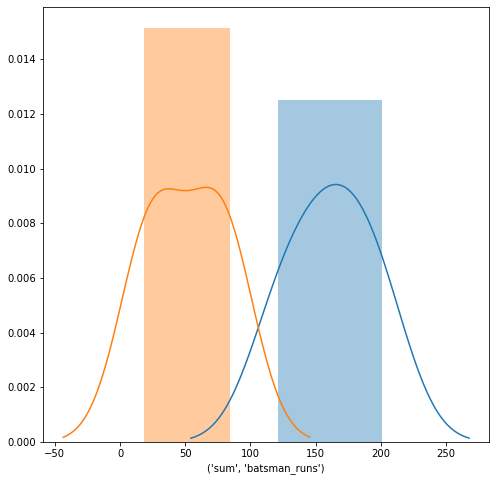

In [137]:
plt.figure(figsize = (8,8))
sb.distplot(main_rahul["('sum\', \'total_runs\')"])
sb.distplot(main_rahul["('sum\', \'batsman_runs\')"])


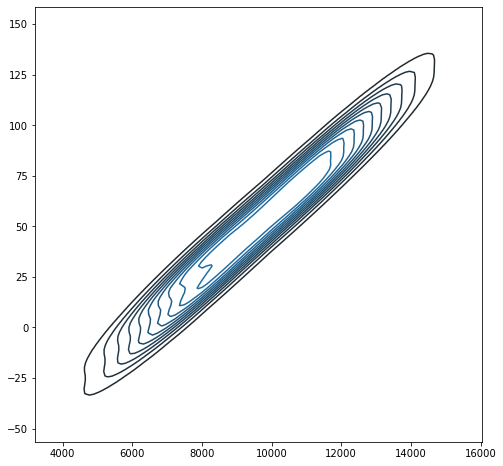

In [143]:
plt.figure(figsize = (8,8))
sb.kdeplot(data = main_rahul ,  data2 = main_rahul["('sum\', \'total_runs\')"] , hue = main_rahul["('sum\', \'batsman_runs\')"] , multiple = 'stack')

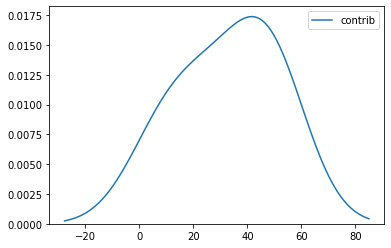

In [170]:
sb.kdeplot(main_rahul['contrib'])

In [145]:
# avg contribution of around 35-40 +

In [146]:
# lets check wrt all team

In [147]:
kxp_bat_all_ball = df[(((df['batting_team'] == 'Kings XI Punjab') ))]
kxp_bat_all_ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
838,4,2,Kings XI Punjab,Rising Pune Supergiant,1,1,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
839,4,2,Kings XI Punjab,Rising Pune Supergiant,1,2,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
840,4,2,Kings XI Punjab,Rising Pune Supergiant,1,3,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
841,4,2,Kings XI Punjab,Rising Pune Supergiant,1,4,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
842,4,2,Kings XI Punjab,Rising Pune Supergiant,1,5,M Vohra,HM Amla,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177869,11346,2,Kings XI Punjab,Chennai Super Kings,18,3,S Curran,Mandeep Singh,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177870,11346,2,Kings XI Punjab,Chennai Super Kings,18,4,S Curran,Mandeep Singh,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177871,11346,2,Kings XI Punjab,Chennai Super Kings,18,5,Mandeep Singh,S Curran,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177872,11346,2,Kings XI Punjab,Chennai Super Kings,17,6,Mandeep Singh,S Curran,RA Jadeja,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [153]:
total = kxp_bat_all_ball.pivot_table(index = ['match_id'], aggfunc=['sum'] , values = ['total_runs'])
total

,sum
,total_runs
match_id,
4,164
8,150
11,170
15,137
19,154
...,...
11328,168
11333,190


In [154]:
total = pd.DataFrame(total.to_records())
total

,match_id,"('sum', 'total_runs')"
0,4,164
1,8,150
2,11,170
3,15,137
4,19,154
...,...,...
171,11328,168
172,11333,190
173,11339,174
174,11343,186


In [156]:
total['match_id'].unique()

array([    4,     8,    11,    15,    19,    22,    26,    32,    35,
          42,    46,    48,    50,    54,    61,    65,    69,    73,
          77,    81,    84,    91,    94,    97,   100,   106,   108,
         112,   116,   120,   123,   127,   130,   135,   139,   142,
         145,   149,   151,   157,   161,   164,   169,   177,   181,
         186,   190,   193,   196,   201,   205,   208,   212,   215,
         218,   225,   228,   239,   243,   249,   256,   259,   270,
         273,   280,   284,   287,   290,   293,   296,   300,   311,
         315,   321,   325,   330,   333,   336,   340,   343,   350,
         354,   359,   366,   369,   371,   374,   387,   391,   398,
         400,   405,   409,   412,   415,   421,   425,   429,   436,
         440,   443,   448,   450,   460,   464,   466,   472,   475,
         479,   486,   488,   491,   496,   502,   505,   509,   512,
         514,   516,   517,   520,   524,   528,   532,   536,   542,
         544,   548,

In [157]:
main_total = total.tail(28)
main_total

,match_id,"('sum', 'total_runs')"
148,7895,168
149,7901,161
150,7905,198
151,7909,201
152,7911,128
153,7915,157
154,7918,121
155,7927,184
156,7931,158
157,7933,149


In [163]:
rahul = kxp_bat_all_ball[kxp_bat_all_ball['batsman'] == 'KL Rahul']

In [164]:
rahul['match_id'].unique()

array([ 7895,  7901,  7905,  7909,  7911,  7915,  7918,  7927,  7931,
        7933,  7937,  7941,  7943,  7949, 11140, 11142, 11145, 11149,
       11309, 11313, 11315, 11319, 11323, 11328, 11333, 11339, 11343,
       11346], dtype=int64)

In [165]:
rahul_total = rahul.pivot_table(index = ['match_id'], aggfunc=['sum'] , values = ['batsman_runs'])
rahul_total = pd.DataFrame(rahul_total.to_records())
rahul_total

,match_id,"('sum', 'batsman_runs')"
0,7895,51
1,7901,48
2,7905,37
3,7909,18
4,7911,61
5,7915,23
6,7918,32
7,7927,24
8,7931,86
9,7933,101


In [166]:
main_rahul_all = pd.merge(rahul_total , right = main_total,on = 'match_id' , how = 'inner')
main_rahul_all

,match_id,"('sum', 'batsman_runs')","('sum', 'total_runs')"
0,7895,51,168
1,7901,48,161
2,7905,37,198
3,7909,18,201
4,7911,61,128
5,7915,23,157
6,7918,32,121
7,7927,24,184
8,7931,86,158
9,7933,101,149


In [167]:
main_rahul_all['contrib'] = (main_rahul_all["('sum\', \'batsman_runs\')"] / main_rahul_all["('sum\', \'total_runs\')"])*100

In [168]:
main_rahul_all

,match_id,"('sum', 'batsman_runs')","('sum', 'total_runs')",contrib
0,7895,51,168,30.357143
1,7901,48,161,29.813665
2,7905,37,198,18.686869
3,7909,18,201,8.955224
4,7911,61,128,47.656250
5,7915,23,157,14.649682
6,7918,32,121,26.446281
7,7927,24,184,13.043478
8,7931,86,158,54.430380
9,7933,101,149,67.785235


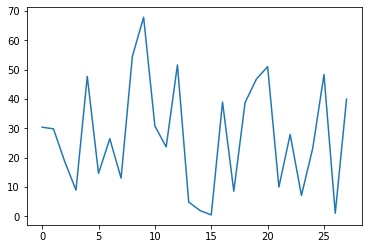

In [169]:
plt.plot(main_rahul_all['contrib'])

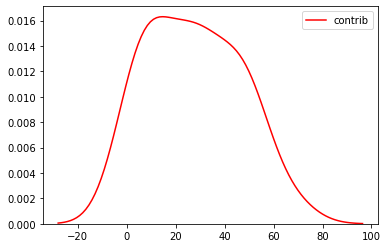

In [172]:
sb.kdeplot(main_rahul_all['contrib'] , color= "red")

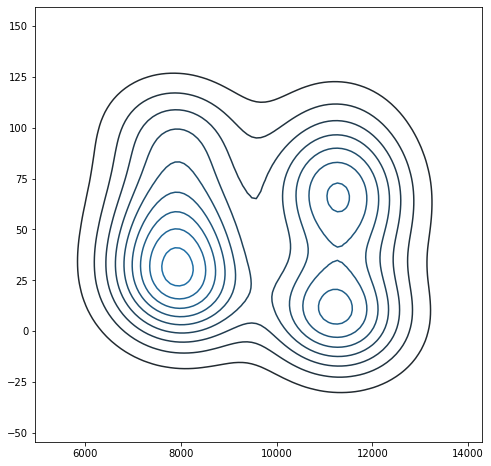

In [173]:
plt.figure(figsize = (8,8))
sb.kdeplot(data = main_rahul_all ,  data2 = main_rahul_all["('sum\', \'total_runs\')"] , hue = main_rahul_all["('sum\', \'batsman_runs\')"] , multiple = 'stack')

In [174]:
# Avg contribution is around = 30-50

# Take Aways :
### 1 - Rahul is a class player ,and always scores the most runs for his team
### 2 - He is the opener  ,so he should play a bit safe for starting 10 balls
### 3 - Acc to stats , he scored around (30-50) % contribution for his team

# Ques 3 ans - More than 23 %

In [178]:
############################################################################################################################3

# Ques 4- Balls taken by SRH to reach 50 ?

In [179]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4312,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,1,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4313,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,2,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4314,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,3,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4315,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,4,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4316,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,5,S Dhawan,DA Warner,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176407,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,2,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
176408,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,3,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
176409,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,4,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,M Ur Rahman,bowled,NaN
176410,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,5,Mohammed Shami,M Ashwin,S Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [180]:
main_df_team_bat_srh = main_df_team[ ((main_df_team['batting_team'] == 'Sunrisers Hyderabad'))]
main_df_team_bat_srh

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4312,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,1,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4313,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,2,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4314,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,3,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4315,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,4,DA Warner,S Dhawan,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
4316,19,1,Sunrisers Hyderabad,Kings XI Punjab,1,5,S Dhawan,DA Warner,Sandeep Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176280,11339,1,Sunrisers Hyderabad,Kings XI Punjab,20,3,V Shankar,Ankit Sharma,A Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
176281,11339,1,Sunrisers Hyderabad,Kings XI Punjab,20,4,Ankit Sharma,V Shankar,A Singh,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
176282,11339,1,Sunrisers Hyderabad,Kings XI Punjab,20,5,Ankit Sharma,V Shankar,A Singh,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
176283,11339,1,Sunrisers Hyderabad,Kings XI Punjab,20,6,Ankit Sharma,V Shankar,A Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [224]:
matches = main_df_team_bat_srh['match_id'].unique()
matches

array([   19,    32,   405,   440,   466,   496,   544,   564,   594,
         622,  7909,  7918, 11313, 11339], dtype=int64)

In [225]:
balls = []
mat = []
t =[]
for i in matches:
    c = 0
    runs =0
    m = main_df_team_bat_srh[main_df_team_bat_srh['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in range(len(m)):
        runs = runs + m.loc[j , 'total_runs']
        
        if runs <= 50:
            c = c+1
    balls.append(c)
    mat.append(i)


In [226]:
balls

[59, 30, 54, 46, 48, 36, 31, 26, 26, 35, 41, 46, 56, 21]

In [227]:
mat

[19, 32, 405, 440, 466, 496, 544, 564, 594, 622, 7909, 7918, 11313, 11339]

In [201]:
# Mode and avg balls required to reach 50 runs against KXP

In [229]:
np.array(balls).mean() , np.median(np.array(balls))

(39.642857142857146, 38.5)

In [230]:
#avg is 40 balls and mode is 39

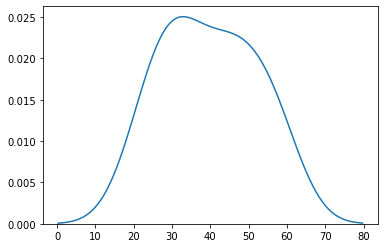

In [231]:
sb.kdeplot(balls)

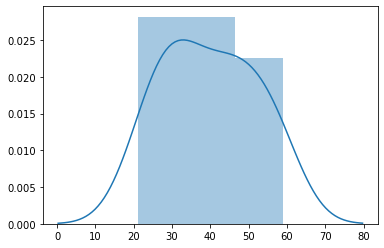

In [232]:
sb.distplot(balls)

In [209]:
# lets check wrt all team

In [210]:
srh_bat_allball = df[( ((df['batting_team'] == 'Sunrisers Hyderabad')))]
srh_bat_allball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178462,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,5,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
178463,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,6,Mohammad Nabi,DJ Hooda,K Paul,0,...,0,0,0,0,0,0,0,Mohammad Nabi,caught,AR Patel
178464,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,7,DJ Hooda,Rashid Khan,K Paul,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
178465,11413,1,Sunrisers Hyderabad,Delhi Capitals,20,8,Rashid Khan,B Kumar,K Paul,0,...,0,0,0,0,0,0,0,Rashid Khan,caught,RR Pant


In [236]:
matches = srh_bat_allball['match_id'].unique()
matches

array([    1,     6,    10,    14,    19,    21,    25,    32,    36,
          39,    43,    47,    52,    57,   384,   388,   394,   397,
         402,   405,   414,   416,   423,   428,   432,   435,   440,
         444,   449,   453,   455,   461,   466,   469,   474,   477,
         481,   487,   489,   493,   496,   500,   503,   507,   511,
         521,   525,   529,   531,   537,   541,   544,   551,   555,
         558,   561,   564,   568,   572,   580,   584,   588,   591,
         594,   598,   603,   610,   613,   616,   618,   622,   628,
         631,   634,   635,   636,  7897,  7900,  7903,  7909,  7913,
        7916,  7918,  7921,  7929,  7932,  7935,  7939,  7944,  7947,
        7950,  7952,  7953, 11138, 11144, 11147, 11152, 11310, 11313,
       11321, 11324, 11329, 11332, 11336, 11339, 11342, 11345, 11413],
      dtype=int64)

In [237]:
balls = []
mat = []
t =[]
for i in matches:
    c = 0
    runs =0
    m = srh_bat_allball[srh_bat_allball['match_id'] == i]
    m = m.reset_index(drop = True)
    for j in range(len(m)):
        runs = runs + m.loc[j , 'total_runs']
        
        if runs <= 50:
            c = c+1
    balls.append(c)
    mat.append(i)


In [238]:
balls

[35,
 33,
 44,
 52,
 59,
 43,
 41,
 30,
 22,
 30,
 42,
 39,
 41,
 55,
 50,
 54,
 60,
 43,
 70,
 54,
 45,
 54,
 45,
 52,
 48,
 42,
 46,
 38,
 67,
 45,
 63,
 51,
 48,
 35,
 46,
 44,
 42,
 36,
 30,
 44,
 36,
 45,
 36,
 32,
 38,
 36,
 26,
 56,
 38,
 43,
 35,
 31,
 25,
 42,
 31,
 46,
 26,
 31,
 58,
 34,
 62,
 51,
 28,
 26,
 74,
 40,
 53,
 35,
 55,
 35,
 35,
 43,
 40,
 46,
 43,
 33,
 34,
 34,
 42,
 41,
 47,
 31,
 46,
 43,
 34,
 50,
 33,
 48,
 32,
 28,
 41,
 39,
 44,
 36,
 29,
 29,
 27,
 49,
 56,
 45,
 27,
 28,
 35,
 34,
 21,
 28,
 29,
 34]

In [239]:
mat

[1,
 6,
 10,
 14,
 19,
 21,
 25,
 32,
 36,
 39,
 43,
 47,
 52,
 57,
 384,
 388,
 394,
 397,
 402,
 405,
 414,
 416,
 423,
 428,
 432,
 435,
 440,
 444,
 449,
 453,
 455,
 461,
 466,
 469,
 474,
 477,
 481,
 487,
 489,
 493,
 496,
 500,
 503,
 507,
 511,
 521,
 525,
 529,
 531,
 537,
 541,
 544,
 551,
 555,
 558,
 561,
 564,
 568,
 572,
 580,
 584,
 588,
 591,
 594,
 598,
 603,
 610,
 613,
 616,
 618,
 622,
 628,
 631,
 634,
 635,
 636,
 7897,
 7900,
 7903,
 7909,
 7913,
 7916,
 7918,
 7921,
 7929,
 7932,
 7935,
 7939,
 7944,
 7947,
 7950,
 7952,
 7953,
 11138,
 11144,
 11147,
 11152,
 11310,
 11313,
 11321,
 11324,
 11329,
 11332,
 11336,
 11339,
 11342,
 11345,
 11413]

In [241]:
# wrt all team
np.array(balls).mean() , np.median(np.array(balls))

(41.074074074074076, 41.0)

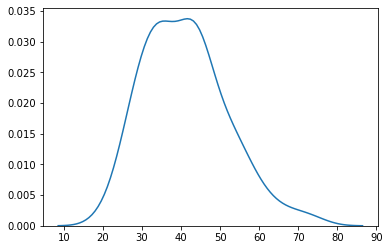

In [242]:
sb.kdeplot(balls)

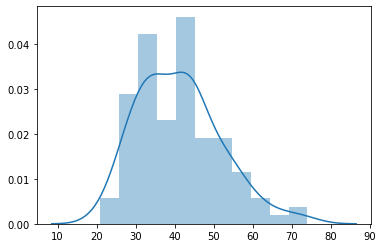

In [243]:
sb.distplot(balls)

In [218]:
# avg balls = 40 , mode  = 35 wrt all team

# Take Aways:
### 1 - SRH has a good opening batting
### 2 - Avg against KXP is 40 balls , and avg againt all team is 41
### 3 - Median against kxp is 39 , and against all is 41

# Ques 4 ans - (37-42)

In [220]:
#############################################################################################################################

# Ques 5 - Runs scored by Gayle in first 10 balls

In [246]:
gayle = main_df_team[main_df_team['batting_team'] == 'Kings XI Punjab']

In [248]:
gayle

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
4437,19,2,Kings XI Punjab,Sunrisers Hyderabad,1,1,HM Amla,M Vohra,B Kumar,0,...,0,0,0,0,0,0,0,HM Amla,lbw,NaN
4438,19,2,Kings XI Punjab,Sunrisers Hyderabad,1,2,GJ Maxwell,M Vohra,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4439,19,2,Kings XI Punjab,Sunrisers Hyderabad,1,3,GJ Maxwell,M Vohra,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4440,19,2,Kings XI Punjab,Sunrisers Hyderabad,1,4,GJ Maxwell,M Vohra,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4441,19,2,Kings XI Punjab,Sunrisers Hyderabad,1,5,GJ Maxwell,M Vohra,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176407,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,2,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
176408,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,3,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
176409,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,4,M Ur Rahman,M Ashwin,S Sharma,0,...,0,0,0,0,0,0,0,M Ur Rahman,bowled,NaN
176410,11339,2,Kings XI Punjab,Sunrisers Hyderabad,20,5,Mohammed Shami,M Ashwin,S Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [249]:
gayle['batsman'].unique()

array(['HM Amla', 'GJ Maxwell', 'M Vohra', 'EJG Morgan', 'DA Miller',
       'WP Saha', 'AR Patel', 'MM Sharma', 'KC Cariappa', 'I Sharma',
       'Sandeep Sharma', 'MJ Guptill', 'SE Marsh', 'Anureet Singh',
       'Mandeep Singh', 'AC Gilchrist', 'PC Valthaty', 'DJ Hussey',
       'PP Chawla', 'Gurkeerat Singh', 'Azhar Mahmood', 'P Kumar',
       'AD Mascarenhas', 'LA Pomersbach', 'R Sathish', 'Harmeet Singh',
       'P Awana', 'CA Pujara', 'V Sehwag', 'GJ Bailey', 'MG Johnson',
       'M Vijay', 'R Dhawan', 'NS Naik', 'KL Rahul', 'CH Gayle',
       'MA Agarwal', 'KK Nair', 'AJ Finch', 'MK Tiwary', 'R Ashwin',
       'AJ Tye', 'BB Sran', 'AS Rajpoot', 'M Ur Rahman', 'S Curran',
       'N Pooran', 'S Singh', 'Mohammed Shami', 'M Ashwin'], dtype=object)

In [250]:
gayle = gayle[gayle['batsman'] =='CH Gayle' ]
gayle

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
153984,7909,1,Kings XI Punjab,Sunrisers Hyderabad,1,6,CH Gayle,KL Rahul,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
153985,7909,1,Kings XI Punjab,Sunrisers Hyderabad,2,1,CH Gayle,KL Rahul,CJ Jordan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
153986,7909,1,Kings XI Punjab,Sunrisers Hyderabad,2,2,CH Gayle,KL Rahul,CJ Jordan,0,...,0,4,0,0,4,4,8,NaN,NaN,NaN
153987,7909,1,Kings XI Punjab,Sunrisers Hyderabad,2,3,CH Gayle,KL Rahul,CJ Jordan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
153988,7909,1,Kings XI Punjab,Sunrisers Hyderabad,2,4,CH Gayle,KL Rahul,CJ Jordan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169994,11313,2,Kings XI Punjab,Sunrisers Hyderabad,3,6,CH Gayle,KL Rahul,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
169995,11313,2,Kings XI Punjab,Sunrisers Hyderabad,4,1,CH Gayle,KL Rahul,Rashid Khan,0,...,0,0,0,0,0,0,0,CH Gayle,caught,DJ Hooda
176291,11339,2,Kings XI Punjab,Sunrisers Hyderabad,1,7,CH Gayle,KL Rahul,K Ahmed,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
176292,11339,2,Kings XI Punjab,Sunrisers Hyderabad,1,8,CH Gayle,KL Rahul,K Ahmed,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [252]:
matches = gayle['match_id'].unique()

In [254]:
runs, ma = [],[]
for i in matches:
    r = 0
    m = gayle[gayle['match_id'] == i]
    m = m.reset_index(drop = True)
    if len(m) > 10:
        m = m.head(10)
    for j in range(len(m)):
        r = r + m.loc[j , 'batsman_runs']
    runs.append(r)
    ma.append(i)

In [255]:
runs

[17, 10, 15, 4]

In [256]:
ma

[7909, 7918, 11313, 11339]

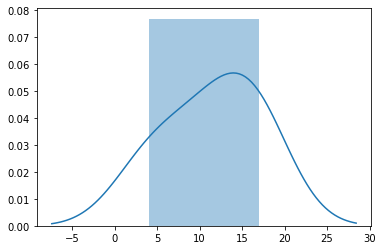

In [260]:
sb.distplot(runs)

In [261]:
# lets check wrt all team

In [263]:
gayle_all = df[df['batsman'] == 'CH Gayle']

In [264]:
gayle_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
131,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
132,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
133,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,Mandeep Singh,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
137,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,3,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177820,11346,2,Kings XI Punjab,Chennai Super Kings,10,5,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177821,11346,2,Kings XI Punjab,Chennai Super Kings,10,6,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177822,11346,2,Kings XI Punjab,Chennai Super Kings,10,7,CH Gayle,KL Rahul,DJ Bravo,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177825,11346,2,Kings XI Punjab,Chennai Super Kings,11,2,CH Gayle,KL Rahul,Harbhajan Singh,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [265]:
matches = gayle_all['match_id'].unique()
runs, ma = [],[]
for i in matches:
    r = 0
    m = gayle_all[gayle_all['match_id'] == i]
    m = m.reset_index(drop = True)
    if len(m) > 10:
        m = m.head(10)
    for j in range(len(m)):
        r = r + m.loc[j , 'batsman_runs']
    runs.append(r)
    ma.append(i)

In [266]:
runs

[21,
 6,
 3,
 16,
 2,
 7,
 0,
 0,
 15,
 4,
 4,
 6,
 12,
 14,
 7,
 3,
 5,
 14,
 14,
 4,
 15,
 20,
 8,
 7,
 0,
 13,
 21,
 14,
 5,
 24,
 13,
 34,
 0,
 20,
 8,
 28,
 0,
 2,
 9,
 8,
 4,
 10,
 4,
 12,
 14,
 4,
 2,
 10,
 6,
 5,
 27,
 4,
 11,
 11,
 4,
 13,
 8,
 21,
 9,
 19,
 10,
 4,
 6,
 4,
 7,
 13,
 10,
 20,
 9,
 22,
 4,
 6,
 8,
 5,
 6,
 6,
 7,
 13,
 1,
 9,
 9,
 10,
 21,
 21,
 8,
 14,
 35,
 1,
 7,
 10,
 1,
 0,
 7,
 5,
 2,
 9,
 6,
 1,
 9,
 11,
 10,
 17,
 13,
 10,
 6,
 8,
 2,
 14,
 6,
 18,
 0,
 9,
 11,
 18,
 6,
 15,
 15,
 6,
 13,
 24,
 24,
 4,
 13,
 6]

In [267]:
ma

[1,
 5,
 12,
 20,
 27,
 30,
 42,
 45,
 55,
 121,
 123,
 126,
 132,
 134,
 138,
 142,
 191,
 196,
 200,
 204,
 208,
 213,
 217,
 222,
 227,
 258,
 263,
 268,
 280,
 283,
 288,
 291,
 296,
 302,
 304,
 306,
 307,
 317,
 320,
 326,
 329,
 333,
 338,
 344,
 350,
 356,
 360,
 362,
 367,
 372,
 376,
 383,
 388,
 392,
 396,
 401,
 407,
 411,
 417,
 420,
 426,
 429,
 432,
 438,
 441,
 448,
 452,
 475,
 481,
 484,
 488,
 492,
 495,
 499,
 503,
 506,
 522,
 525,
 534,
 540,
 543,
 546,
 550,
 557,
 562,
 566,
 568,
 571,
 574,
 575,
 580,
 587,
 606,
 617,
 620,
 624,
 626,
 632,
 633,
 636,
 7905,
 7909,
 7911,
 7918,
 7927,
 7931,
 7933,
 7937,
 7941,
 7943,
 7949,
 11140,
 11142,
 11145,
 11309,
 11313,
 11315,
 11319,
 11323,
 11328,
 11333,
 11339,
 11343,
 11346]

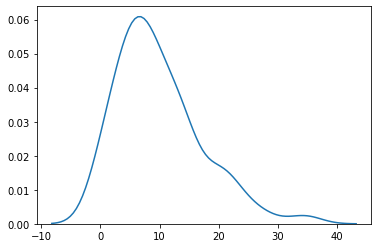

In [268]:
sb.kdeplot(runs)

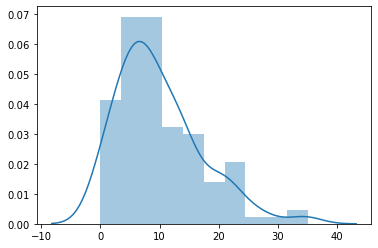

In [269]:
sb.distplot(runs)

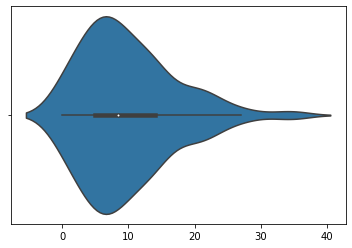

In [270]:
sb.violinplot(runs)

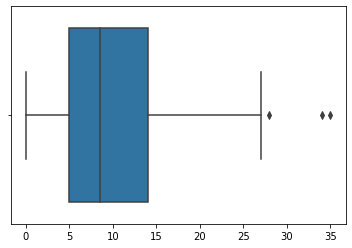

In [271]:
sb.boxplot(runs)

In [275]:
#lets take last 5 seasons

In [277]:
gayle_all = gayle_all.tail(1000)

In [278]:
matches = gayle_all['match_id'].unique()
runs, ma = [],[]
for i in matches:
    r = 0
    m = gayle_all[gayle_all['match_id'] == i]
    m = m.reset_index(drop = True)
    if len(m) > 10:
        m = m.head(10)
    for j in range(len(m)):
        r = r + m.loc[j , 'batsman_runs']
    runs.append(r)
    ma.append(i)

In [279]:
runs

[1,
 9,
 10,
 21,
 21,
 8,
 14,
 35,
 1,
 7,
 10,
 1,
 0,
 7,
 5,
 2,
 9,
 6,
 1,
 9,
 11,
 10,
 17,
 13,
 10,
 6,
 8,
 2,
 14,
 6,
 18,
 0,
 9,
 11,
 18,
 6,
 15,
 15,
 6,
 13,
 24,
 24,
 4,
 13,
 6]

In [280]:
ma

[540,
 543,
 546,
 550,
 557,
 562,
 566,
 568,
 571,
 574,
 575,
 580,
 587,
 606,
 617,
 620,
 624,
 626,
 632,
 633,
 636,
 7905,
 7909,
 7911,
 7918,
 7927,
 7931,
 7933,
 7937,
 7941,
 7943,
 7949,
 11140,
 11142,
 11145,
 11309,
 11313,
 11315,
 11319,
 11323,
 11328,
 11333,
 11339,
 11343,
 11346]

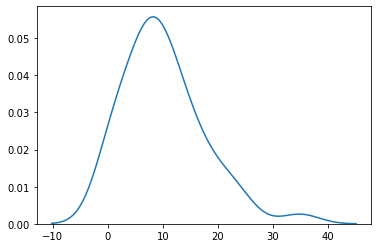

In [281]:
sb.kdeplot(runs)

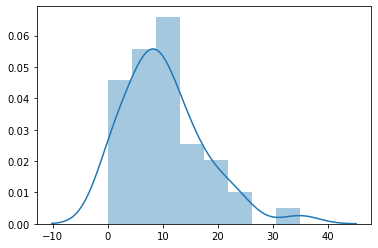

In [282]:
sb.distplot(runs)

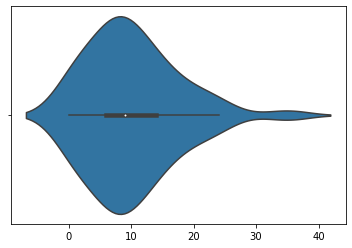

In [283]:
sb.violinplot(runs)

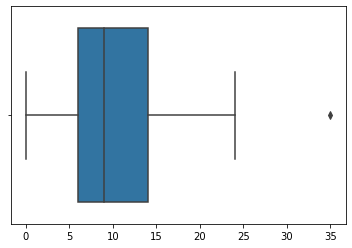

In [284]:
sb.boxplot(runs)

# Take Aways:
### 1 - Gayle scores around (6-12) runs in the start 10 balls
### 2 -Median is around 8 for all  stats

# Ques 5 ans - Less than 10 runs